# **MLDL Project**

In [ ]:
  !unzip -u "/content/drive/MyDrive/DL/dataset.zip" -d "/content/drive/MyDrive/DL/data"

Archive:  /content/drive/MyDrive/DL/dataset.zip
   creating: /content/drive/MyDrive/DL/data/dataset/ammonia/
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a1.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a10.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a2.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a3.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a4.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a5.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a6.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a7.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a8.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/ammonia/a9.jpg  
   creating: /content/drive/MyDrive/DL/data/dataset/dissolved_oxygen/
  inflating: /content/drive/MyDrive/DL/data/dataset/dissolved_oxygen/o1.jpg  
  inflating: /content/drive/MyDrive/DL/data/dataset/

In [ ]:
import os

parent_folder_path = "/content/drive/MyDrive/DL/data/dataset"

folders = ["Trichodesmium erythraeum", "ammonia", "dissolved_oxygen", "oil_slick","oil_spill","phosphate"]

for folder in folders:
    folder_path = os.path.join(parent_folder_path, folder)
    if os.path.isdir(folder_path):
        num_files = len(os.listdir(folder_path))
        print(f"{folder} contains {num_files} files.")
    else:
        print(f"{folder} is not a directory.")


Trichodesmium erythraeum contains 120 files.
ammonia contains 160 files.
dissolved_oxygen contains 116 files.
oil_slick contains 144 files.
oil_spill contains 124 files.
phosphate contains 252 files.


## **Augmentation**

In [ ]:
import os
import cv2

def flip_and_rotate_images(folder_path):
    # Loop through all images in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Load the image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            # Flip the image horizontally
            img_flip_h = cv2.flip(img, 1)
            # Save the flipped image
            cv2.imwrite(os.path.join(folder_path, 'flip_h_'+filename), img_flip_h)

            # Flip the image vertically
            img_flip_v = cv2.flip(img, 0)
            # Save the flipped image
            cv2.imwrite(os.path.join(folder_path, 'flip_v_'+filename), img_flip_v)

            # Rotate the image clockwise by 90 degrees
            img_rotate = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            # Save the rotated image
            cv2.imwrite(os.path.join(folder_path, 'rotate_'+filename), img_rotate)


In [ ]:
flip_and_rotate_images("/content/drive/MyDrive/DL/data/dataset/Trichodesmium erythraeum")

In [ ]:
flip_and_rotate_images("/content/drive/MyDrive/DL/data/dataset/ammonia")

In [ ]:
flip_and_rotate_images("/content/drive/MyDrive/DL/data/dataset/dissolved_oxygen")

In [ ]:
flip_and_rotate_images("/content/drive/MyDrive/DL/data/dataset/oil_slick")

In [ ]:
flip_and_rotate_images("/content/drive/MyDrive/DL/data/dataset/oil_spill")

In [ ]:
flip_and_rotate_images("/content/drive/MyDrive/DL/data/dataset/phosphate")

In [ ]:
import os
import cv2

def apply_gaussian_blur(folder_path, kernel_size):
    # Loop through all images in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Load the image
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)

            # Apply Gaussian blur
            img_blur = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

            # Save the blurred image
            cv2.imwrite(os.path.join(folder_path, 'blur_'+str(kernel_size)+'_'+filename), img_blur)


In [ ]:
apply_gaussian_blur("/content/drive/MyDrive/DL/data/dataset/ammonia",5)

In [ ]:
apply_gaussian_blur("/content/drive/MyDrive/DL/data/dataset/Trichodesmium erythraeum",5)

In [ ]:
import os
import cv2
import numpy as np

def add_noise_to_images(folder_path, noise_type='salt_and_pepper', mean=0, var=0.1):
    # Get a list of all the image files in the folder
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.jpg')]

    # Loop over each image file and add noise
    for image_file in image_files:
        # Read the image
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)

        # Add noise
        if noise_type == 'gaussian':
            noise = np.random.normal(mean, var ** 0.5, image.shape)
            noisy_image = image + noise
        elif noise_type == 'salt_and_pepper':
            noise = np.zeros(image.shape, np.uint8)
            cv2.randu(noise, 0, 255)
            black = noise < 30
            white = noise > 225
            noisy_image = image.copy()
            noisy_image[black] = 0
            noisy_image[white] = 255
        elif noise_type == 'speckle':
            noise = np.random.normal(0, 1, image.shape)
            noisy_image = image + image * noise

        # Save the noisy image
        noisy_image_path = os.path.join(folder_path, f"{image_file.split('.')[0]}_{noise_type}_noise.jpg")
        cv2.imwrite(noisy_image_path, noisy_image)


In [ ]:
add_noise_to_images("/content/drive/MyDrive/DL/data/dataset/ammonia")

In [ ]:
import os

parent_folder_path = "/content/drive/MyDrive/DL/data/dataset"

folders = ["Trichodesmium erythraeum", "ammonia", "dissolved_oxygen", "oil_slick","oil_spill","phosphate"]

for folder in folders:
    folder_path = os.path.join(parent_folder_path, folder)
    if os.path.isdir(folder_path):
        num_files = len(os.listdir(folder_path))
        print(f"{folder} contains {num_files} files.")
    else:
        print(f"{folder} is not a directory.")


Trichodesmium erythraeum contains 120 files.
ammonia contains 160 files.
dissolved_oxygen contains 116 files.
oil_slick contains 144 files.
oil_spill contains 124 files.
phosphate contains 252 files.


In [ ]:
import pathlib
import tensorflow as tf
data_dir = pathlib.Path("/content/drive/MyDrive/DL/data/dataset")


In [ ]:
img_height=224
img_width=224

In [ ]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),batch_size=32)


Found 916 files belonging to 6 classes.
Using 733 files for training.


In [ ]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),batch_size=32)


Found 916 files belonging to 6 classes.
Using 183 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
import numpy as np
normalized_ds=train_ds.map(lambda x,y:(normalization_layer(x),y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0 0.9406964


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


## CNN Architectures

1. InceptionV3

In [ ]:

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model1 = InceptionV3(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model1.layers[:10]:
    layer.trainable = False
x = base_model1.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
predictions1 = Dense(6, activation='softmax')(x)
model1 = Model(inputs=base_model1.inputs, outputs=predictions1)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/content/drive/My Drive/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

In [ ]:
model1.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history1=model1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10)

model1.save('/content/drive/MyDrive/DL/model/InceptionV3_model.h5')

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 49s 274ms/step - loss: 1.2347 - accuracy: 0.5784 - val_loss: 46.7612 - val_accuracy: 0.1694
Epoch 2/10
23/23 [==============================] - 6s 242ms/step - loss: 0.7246 - accuracy: 0.7599 - val_loss: 5.2236 - val_accuracy: 0.1475
Epoch 3/10
23/23 [==============================] - 6s 247ms/step - loss: 0.3352 - accuracy: 0.8868 - val_loss: 5.9546 - val_accuracy: 0.2623
Epoch 4/10
23/23 [==============================] - 6s 241ms/step - loss: 0.3906 - accuracy: 0.8649 - val_loss: 824.8021 - val_accuracy: 0.2131
Epoch 5/10
23/23 [==============================] - 5s 218ms/step - loss: 0.3758 - accuracy: 0.8690 - val_loss: 29.1374 - val_accuracy: 0.3388
Epoch 6/10
23/23 [==============================] - 5s 216ms/step - loss: 0.2580 - accuracy: 0.9086 - val_loss: 2.3082 - val_accuracy: 0.3825
Epoch 7/10
23/23 [==============================] - 5s 218ms/step - loss: 0.2093 - accuracy: 0.9291 - val_loss: 4.7761 - val_accuracy: 0.4536
Epoch 8/10
2

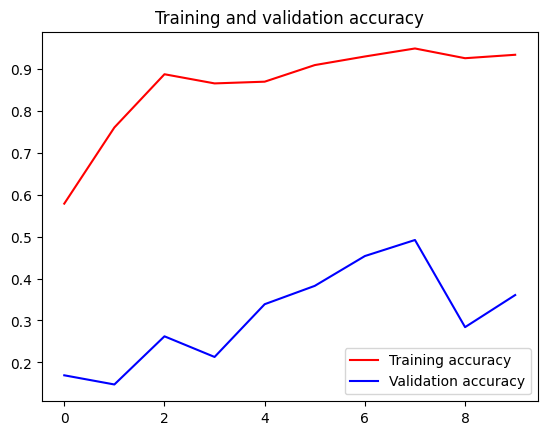

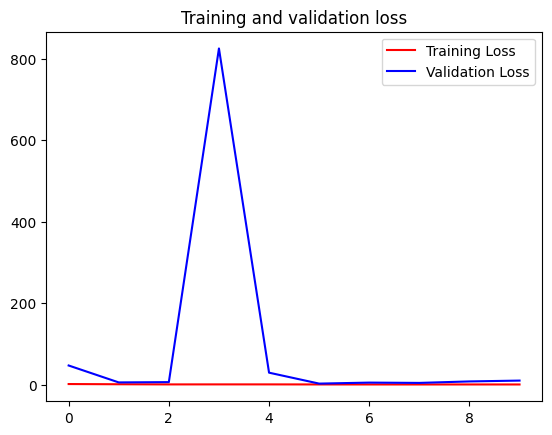

In [ ]:
import matplotlib.pyplot as plt
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
train_label = np.concatenate([y for x, y in train_ds], axis=0)
print(train_label.shape)

test_label = np.concatenate([y for x, y in val_ds], axis=0)
print(test_label.shape)

(733,)
(183,)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model1.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names =["Trichodesmium erythraeum", "ammonia", "dissolved_oxygen", "oil_slick","oil_spill","phosphate"]
print(classification_report(test_label, y_pred, target_names=target_names))



<ipython-input-28-398e4257bc66>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model1.predict_generator(val_ds, 1600)


Confusion Matrix
[[20  7  1  0  0  1]
 [ 0 26  2  0  0  0]
 [ 0 13 14  0  0  0]
 [ 2 25  6  1  2  0]
 [ 0 15  2  0  3  1]
 [ 0 40  0  0  0  2]]
Classification Report
                          precision    recall  f1-score   support

Trichodesmium erythraeum       0.91      0.69      0.78        29
                 ammonia       0.21      0.93      0.34        28
        dissolved_oxygen       0.56      0.52      0.54        27
               oil_slick       1.00      0.03      0.05        36
               oil_spill       0.60      0.14      0.23        21
               phosphate       0.50      0.05      0.09        42

                accuracy                           0.36       183
               macro avg       0.63      0.39      0.34       183
            weighted avg       0.64      0.36      0.31       183



## 2. VGG16 (outperforms)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
base_model2 = VGG16(
                    input_shape=(224, 224, 3),
                    weights='imagenet',
                    include_top=False)
# Freeze the first 10 layers
for layer in base_model2.layers[:10]:
    layer.trainable = False
x = base_model2.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.1)(x)
predictions2 = Dense(6, activation='softmax')(x)
model2 = Model(inputs=base_model2.inputs, outputs=predictions2)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model2.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history2=model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10)

model2.save('/content/drive/MyDrive/DL/model/VGG16.h5')

Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 24s 673ms/step - loss: 12.7195 - accuracy: 0.2142 - val_loss: 1.7978 - val_accuracy: 0.1202
Epoch 2/10
23/23 [==============================] - 5s 225ms/step - loss: 1.7751 - accuracy: 0.2387 - val_loss: 1.7879 - val_accuracy: 0.2295
Epoch 3/10
23/23 [==============================] - 6s 248ms/step - loss: 1.7755 - accuracy: 0.2742 - val_loss: 1.7848 - val_accuracy: 0.2295
Epoch 4/10
23/23 [==============================] - 5s 222ms/step - loss: 1.7582 - accuracy: 0.2865 - val_loss: 1.7838 - val_accuracy: 0.2295
Epoch 5/10
23/23 [==============================] - 6s 249ms/step - loss: 1.7492 - accuracy: 0.2865 - val_loss: 1.7848 - val_accuracy: 0.2295
Epoch 6/10
23/23 [==============================] - 5s 225ms/step - loss: 1.7458 - accuracy: 0.2865 - val_loss: 1.7874 - val_accuracy: 0.2295
Epoch 7/10
23/23 [==============================] - 5s 227ms/step - loss: 1.7428 - accuracy: 0.2865 - val_loss: 1.7898 - val_accuracy: 0.2295
Epoch 8/10
23/2

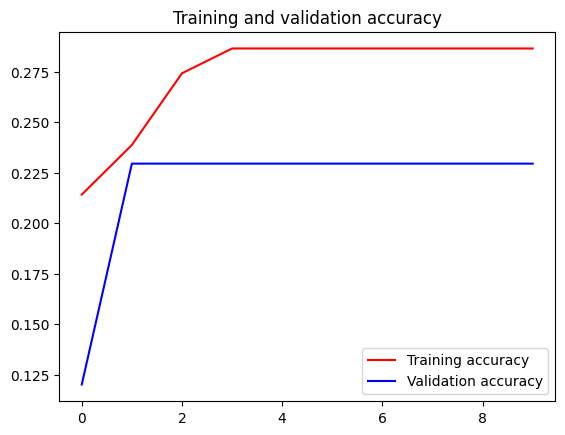

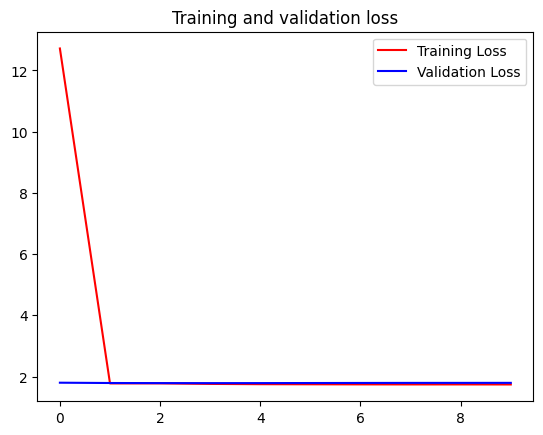

In [ ]:
import matplotlib.pyplot as plt
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model2.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names =["Trichodesmium erythraeum", "ammonia", "dissolved_oxygen", "oil_slick","oil_spill","phosphate"]
print(classification_report(test_label, y_pred, target_names=target_names))



<ipython-input-42-43425027f981>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model2.predict_generator(val_ds, 1600)


Confusion Matrix
[[ 0  0  0  0  0 29]
 [ 0  0  0  0  0 28]
 [ 0  0  0  0  0 27]
 [ 0  0  0  0  0 36]
 [ 0  0  0  0  0 21]
 [ 0  0  0  0  0 42]]
Classification Report
                          precision    recall  f1-score   support

Trichodesmium erythraeum       0.00      0.00      0.00        29
                 ammonia       0.00      0.00      0.00        28
        dissolved_oxygen       0.00      0.00      0.00        27
               oil_slick       0.00      0.00      0.00        36
               oil_spill       0.00      0.00      0.00        21
               phosphate       0.23      1.00      0.37        42

                accuracy                           0.23       183
               macro avg       0.04      0.17      0.06       183
            weighted avg       0.05      0.23      0.09       183



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 3. VGG19 (Outperforms)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input

img_width=224; img_height=224
batch_size=8
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
# autosave best Model

best_model3 = ModelCheckpoint("imagenet", monitor='val_acc', verbose = 1, save_best_only = True)

vgg19_base = VGG19(include_top=False, weights='imagenet',
                   input_tensor=None, input_shape=(img_height, img_width, 3))
# Freeze the first 10 layers
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
for layer in vgg19_base.layers[:10]:
    layer.trainable = False
x = vgg19_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions3 = Dense(6, activation='softmax')(x)
model3= Model(inputs=vgg19_base.inputs, outputs=predictions3)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/content/drive/My Drive/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)
model3.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history3=model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

model3.save('/content/drive/MyDrive/DL/model/VGG19_model.h5')

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 28s 721ms/step - loss: 14.2685 - accuracy: 0.2387 - val_loss: 1.7847 - val_accuracy: 0.2295
Epoch 2/15
23/23 [==============================] - 7s 289ms/step - loss: 1.8560 - accuracy: 0.2701 - val_loss: 1.8151 - val_accuracy: 0.1913
Epoch 3/15
23/23 [==============================] - 7s 290ms/step - loss: 1.7702 - accuracy: 0.2701 - val_loss: 1.7911 - val_accuracy: 0.2295
Epoch 4/15
23/23 [==============================] - 7s 311ms/step - loss: 1.7586 - accuracy: 0.2838 - val_loss: 1.7750 - val_accuracy: 0.2295
Epoch 5/15
23/23 [==============================] - 7s 314ms/step - loss: 1.7501 - accuracy: 0.2851 - val_loss: 1.7738 - val_accuracy: 0.2295
Epoch 6/15
23/23 [==============================] - 7s 294ms/step - loss: 1.7272 - accuracy: 0.2865 - val_loss: 1.6969 - val_accuracy: 0.2295
Epoch 7/15
23/23 [==============================] - 7s 296ms/step - loss: 1.5333 - accuracy: 0.3397 - val_loss: 1.4831 - val_accuracy: 0.3552
Epoch 8/15
23/2

# 4. MobileNet

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input

from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from keras.layers import GlobalAveragePooling2D, Flatten, BatchNormalization, Dense, Dropout
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
img_width = 224
img_height = 224
batch_size = 8

from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
best_model3 = ModelCheckpoint("imagenet", monitor='val_acc', verbose=1, save_best_only=True)

mobilenet_base = MobileNet(include_top=False, weights='imagenet', input_tensor=None, input_shape=(img_height, img_width, 3))

# Freeze the first 10 layers
from tensorflow.keras.layers import MaxPooling2D, GlobalAveragePooling2D
for layer in mobilenet_base.layers[:10]:
    layer.trainable = False

x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
predictions3 = Dense(6, activation='softmax')(x)

model3 = Model(inputs=mobilenet_base.inputs, outputs=predictions3)


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/content/drive/My Drive/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)
model3.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history3=model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

model3.save('/content/drive/MyDrive/DL/model/mobilenet.h5')

Epoch 1/15
23/23 [==============================] - 17s 140ms/step - loss: 0.7263 - accuracy: 0.7776 - val_loss: 5.7934 - val_accuracy: 0.3934
Epoch 2/15
23/23 [==============================] - 2s 99ms/step - loss: 0.1141 - accuracy: 0.9536 - val_loss: 4.8366 - val_accuracy: 0.4536
Epoch 3/15
23/23 [==============================] - 2s 98ms/step - loss: 0.1078 - accuracy: 0.9673 - val_loss: 19.2431 - val_accuracy: 0.2240
Epoch 4/15
23/23 [==============================] - 2s 98ms/step - loss: 0.1260 - accuracy: 0.9659 - val_loss: 9.7604 - val_accuracy: 0.4098
Epoch 5/15
23/23 [==============================] - 2s 99ms/step - loss: 0.1590 - accuracy: 0.9482 - val_loss: 13.5027 - val_accuracy: 0.2404
Epoch 6/15
23/23 [==============================] - 2s 103ms/step - loss: 0.1557 - accuracy: 0.9509 - val_loss: 7.6889 - val_accuracy: 0.4645
Epoch 7/15
23/23 [==============================] - 3s 111ms/step - loss: 0.0734 - accuracy: 0.9727 - val_loss: 3.5059 - val_accuracy: 0.6393
Epoch 8

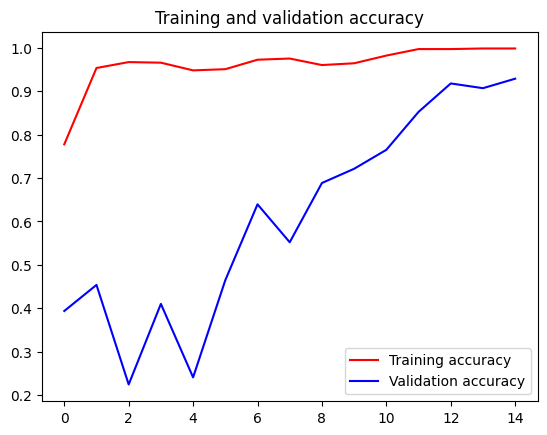

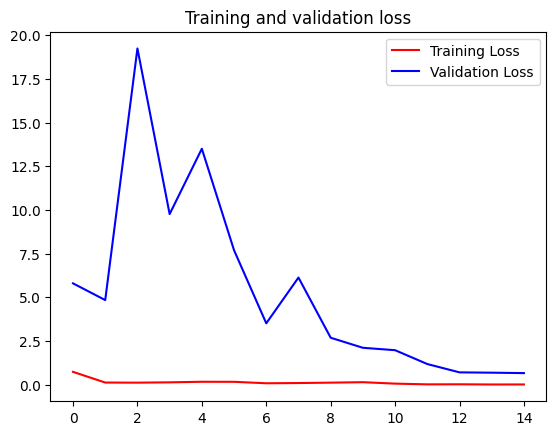

In [ ]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model3.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names =["Trichodesmium erythraeum", "ammonia", "dissolved_oxygen", "oil_slick","oil_spill","phosphate"]
print(classification_report(test_label, y_pred, target_names=target_names))

<ipython-input-21-5b3894da5dcb>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model3.predict_generator(val_ds, 1600)


Confusion Matrix
[[29  0  0  0  0  0]
 [ 0 28  0  0  0  0]
 [ 0  2 25  0  0  0]
 [ 0  4  0 31  1  0]
 [ 0  0  0  5 16  0]
 [ 0  0  1  0  0 41]]
Classification Report
                          precision    recall  f1-score   support

Trichodesmium erythraeum       1.00      1.00      1.00        29
                 ammonia       0.82      1.00      0.90        28
        dissolved_oxygen       0.96      0.93      0.94        27
               oil_slick       0.86      0.86      0.86        36
               oil_spill       0.94      0.76      0.84        21
               phosphate       1.00      0.98      0.99        42

                accuracy                           0.93       183
               macro avg       0.93      0.92      0.92       183
            weighted avg       0.93      0.93      0.93       183



## 5. Resnet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the ResNet50 model with pre-trained weights on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

# Create the final model
model4 = Model(inputs=base_model.input, outputs=predictions)


94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/content/drive/My Drive/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)
model4.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history4=model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

model4.save('/content/drive/MyDrive/DL/model/ResNet50.h5')

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 12s 247ms/step - loss: 0.9561 - accuracy: 0.7340 - val_loss: 0.2487 - val_accuracy: 0.9071
Epoch 2/15
23/23 [==============================] - 3s 126ms/step - loss: 0.1021 - accuracy: 0.9727 - val_loss: 0.0780 - val_accuracy: 0.9836
Epoch 3/15
23/23 [==============================] - 3s 121ms/step - loss: 0.0495 - accuracy: 0.9823 - val_loss: 0.0456 - val_accuracy: 0.9891
Epoch 4/15
23/23 [==============================] - 3s 120ms/step - loss: 0.0152 - accuracy: 0.9973 - val_loss: 0.0275 - val_accuracy: 0.9891
Epoch 5/15
23/23 [==============================] - 3s 120ms/step - loss: 0.0148 - accuracy: 0.9973 - val_loss: 0.0280 - val_accuracy: 0.9891
Epoch 6/15
23/23 [==============================] - 3s 121ms/step - loss: 0.0162 - accuracy: 0.9959 - val_loss: 0.0317 - val_accuracy: 0.9945
Epoch 7/15
23/23 [==============================] - 3s 121ms/step - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0366 - val_accuracy: 0.9836
Epoch 8/15
23/23

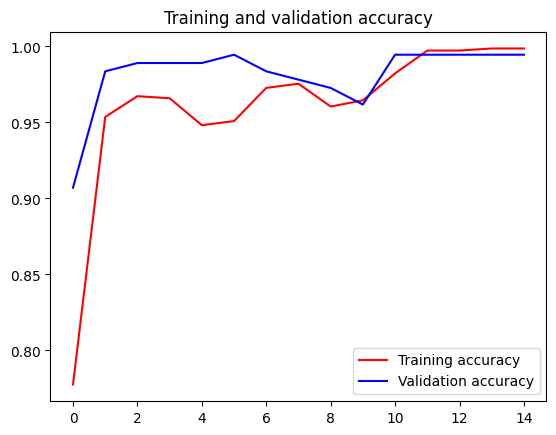

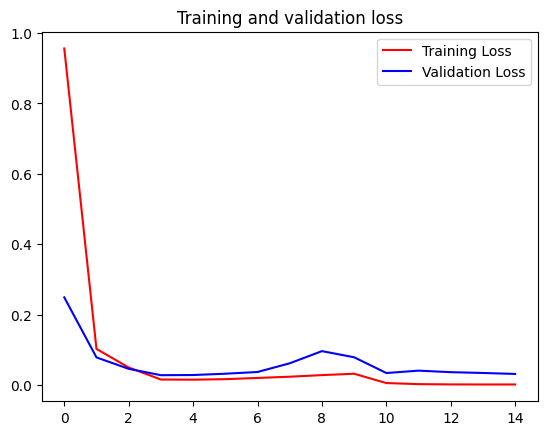

In [ ]:
import matplotlib.pyplot as plt
acc = history3.history['accuracy']
val_acc = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model4.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names =["Trichodesmium erythraeum", "ammonia", "dissolved_oxygen", "oil_slick","oil_spill","phosphate"]
print(classification_report(test_label, y_pred, target_names=target_names))

<ipython-input-27-9efb2f3eb351>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model4.predict_generator(val_ds, 1600)


Confusion Matrix
[[29  0  0  0  0  0]
 [ 0 28  0  0  0  0]
 [ 0  0 27  0  0  0]
 [ 0  0  0 36  0  0]
 [ 0  0  0  1 20  0]
 [ 0  0  0  0  0 42]]
Classification Report
                          precision    recall  f1-score   support

Trichodesmium erythraeum       1.00      1.00      1.00        29
                 ammonia       1.00      1.00      1.00        28
        dissolved_oxygen       1.00      1.00      1.00        27
               oil_slick       0.97      1.00      0.99        36
               oil_spill       1.00      0.95      0.98        21
               phosphate       1.00      1.00      1.00        42

                accuracy                           0.99       183
               macro avg       1.00      0.99      0.99       183
            weighted avg       0.99      0.99      0.99       183



## 6. DenseNet121

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = DenseNet121(
    include_top=False, weights='imagenet', input_shape=(224, 224, 3)
)

# Freeze the first 10 layers
for layer in base_model.layers[:10]:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# Checkpoint to save best model per epoch

model_filepath = "/content/drive/My Drive/model-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(
    filepath=model_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)
model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [ ]:
history5=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

model.save('/content/drive/MyDrive/DL/model/densenet121.h5')

Epoch 1/15


/usr/local/lib/python3.9/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 96s 796ms/step - loss: 0.6724 - accuracy: 0.7585 - val_loss: 3.2829 - val_accuracy: 0.4754
Epoch 2/15
23/23 [==============================] - 8s 359ms/step - loss: 0.4030 - accuracy: 0.8636 - val_loss: 7.8223 - val_accuracy: 0.5246
Epoch 3/15
23/23 [==============================] - 8s 365ms/step - loss: 0.2135 - accuracy: 0.9277 - val_loss: 3.8796 - val_accuracy: 0.4754
Epoch 4/15
23/23 [==============================] - 8s 363ms/step - loss: 0.1920 - accuracy: 0.9263 - val_loss: 6.5562 - val_accuracy: 0.5464
Epoch 5/15
23/23 [==============================] - 8s 359ms/step - loss: 0.2090 - accuracy: 0.9263 - val_loss: 6.5659 - val_accuracy: 0.6721
Epoch 6/15
23/23 [==============================] - 8s 354ms/step - loss: 0.2183 - accuracy: 0.9195 - val_loss: 3.5506 - val_accuracy: 0.6885
Epoch 7/15
23/23 [==============================] - 8s 356ms/step - loss: 0.1400 - accuracy: 0.9550 - val_loss: 1.4431 - val_accuracy: 0.7869
Epoch 8/15
23/23

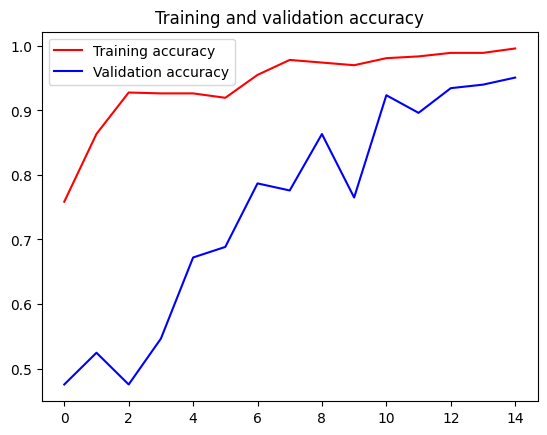

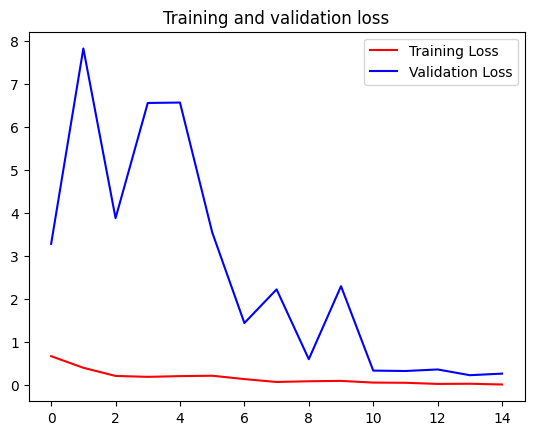

In [ ]:
import matplotlib.pyplot as plt
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']
loss = history5.history['loss']
val_loss = history5.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = ensemble_model.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names =["Trichodesmium erythraeum", "ammonia", "dissolved_oxygen", "oil_slick","oil_spill","phosphate"]
print(classification_report(test_label, y_pred, target_names=target_names))

<ipython-input-45-7433e455e829>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = ensemble_model.predict_generator(val_ds, 1600)


Confusion Matrix
[[16  3  0  1  0  9]
 [ 0 24  0  0  0  4]
 [ 1  1 18  0  0  7]
 [ 0  1  0 35  0  0]
 [ 2  0  0  6 12  1]
 [ 0  0  0  0  0 42]]
Classification Report
                          precision    recall  f1-score   support

Trichodesmium erythraeum       0.84      0.55      0.67        29
                 ammonia       0.83      0.86      0.84        28
        dissolved_oxygen       1.00      0.67      0.80        27
               oil_slick       0.83      0.97      0.90        36
               oil_spill       1.00      0.57      0.73        21
               phosphate       0.67      1.00      0.80        42

                accuracy                           0.80       183
               macro avg       0.86      0.77      0.79       183
            weighted avg       0.84      0.80      0.80       183



# 7. Ensemble Model

In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
model_1 = load_model('/content/drive/MyDrive/DL/model/ResNet50.h5')
model_1 = Model(inputs=model_1.inputs,
                outputs=model_1.outputs,
                name='name_of_model_1')
model_2 = load_model('/content/drive/MyDrive/DL/model/mobilenet.h5')
model_2 = Model(inputs=model_2.inputs,
                outputs=model_2.outputs,
                name='name_of_model_2')
model_3 = load_model("/content/drive/MyDrive/DL/model/InceptionV3_model.h5")
model_3 = Model(inputs=model_3.inputs,
                outputs=model_3.outputs,
                name='name_of_model_3')

model_4 = load_model("/content/drive/MyDrive/DL/model/densenet121.h5")
model_4= Model(inputs=model_4.inputs,
                outputs=model_4.outputs,
                name='name_of_model_4')

In [ ]:
models = [model_1, model_2,model_3,model_4]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
import tensorflow as tf
ensemble_model.compile(optimizer='adam',loss=tf.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history=ensemble_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15)

Epoch 1/15
23/23 [==============================] - 164s 1s/step - loss: 0.0859 - accuracy: 0.9932 - val_loss: 0.5956 - val_accuracy: 0.7650
Epoch 2/15
23/23 [==============================] - 18s 787ms/step - loss: 0.1685 - accuracy: 0.9645 - val_loss: 0.8471 - val_accuracy: 0.2896
Epoch 3/15
23/23 [==============================] - 19s 831ms/step - loss: 0.1816 - accuracy: 0.9686 - val_loss: 0.9612 - val_accuracy: 0.5683
Epoch 4/15
23/23 [==============================] - 18s 774ms/step - loss: 0.1819 - accuracy: 0.9700 - val_loss: 0.6485 - val_accuracy: 0.6612
Epoch 5/15
23/23 [==============================] - 18s 774ms/step - loss: 0.1993 - accuracy: 0.9754 - val_loss: 0.7359 - val_accuracy: 0.7923
Epoch 6/15
23/23 [==============================] - 19s 824ms/step - loss: 0.2618 - accuracy: 0.9509 - val_loss: 0.8428 - val_accuracy: 0.6667
Epoch 7/15
23/23 [==============================] - 18s 776ms/step - loss: 0.2463 - accuracy: 0.9550 - val_loss: 0.7545 - val_accuracy: 0.7869
E

In [ ]:
ensemble_model.save('ensemble.h5')

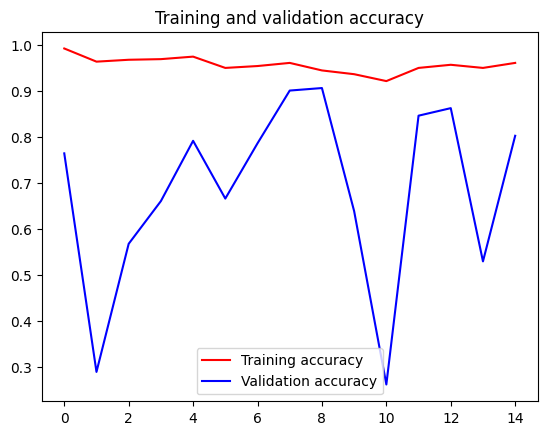

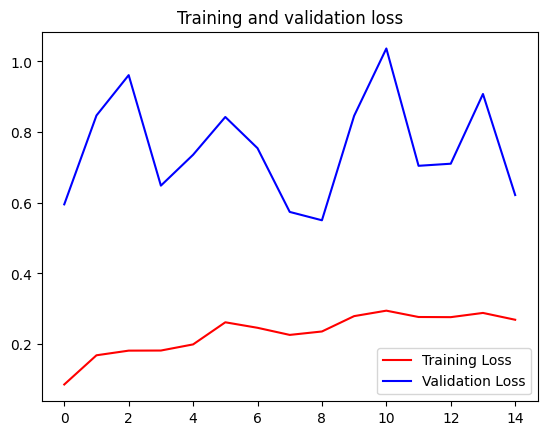

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#Confution Matrix and Classification Report
import matplotlib.pyplot as plt
Y_pred = model.predict_generator(val_ds, 1600)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm=confusion_matrix(test_label, y_pred)
print(cm)
print('Classification Report')
target_names =["Trichodesmium erythraeum", "ammonia", "dissolved_oxygen", "oil_slick","oil_spill","phosphate"]
print(classification_report(test_label, y_pred, target_names=target_names))

<ipython-input-36-914ba4f4ba8b>:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(val_ds, 1600)


Confusion Matrix
[[29  0  0  0  0  0]
 [ 0 27  0  1  0  0]
 [ 0  0 27  0  0  0]
 [ 1  0  2 31  2  0]
 [ 2  0  0  1 18  0]
 [ 0  0  0  0  0 42]]
Classification Report
                          precision    recall  f1-score   support

Trichodesmium erythraeum       0.91      1.00      0.95        29
                 ammonia       1.00      0.96      0.98        28
        dissolved_oxygen       0.93      1.00      0.96        27
               oil_slick       0.94      0.86      0.90        36
               oil_spill       0.90      0.86      0.88        21
               phosphate       1.00      1.00      1.00        42

                accuracy                           0.95       183
               macro avg       0.95      0.95      0.95       183
            weighted avg       0.95      0.95      0.95       183



## Predictions

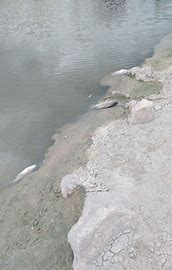

1/1 [==============================] - 0s 408ms/step
ammonia
The predicted image corresponds to "1"


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Creating a dictionary to map each of the indexes to the corresponding number or letter

dict = {0:"Trichodesmium erythraeum",1:"ammonia",2:"dissolved_oxygen",3:"oil_slick",4:"oil_spill",5:"phosphate"}

# Predicting images
MODEL_PATH = '/content/drive/MyDrive/DL/model/mobilenet.h5'
model_dl = load_model(MODEL_PATH)

img = image.load_img("/content/drive/MyDrive/DL/data/dataset/ammonia/a10.jpg", target_size=(224, 224))
img1 = cv2.imread('/content/drive/MyDrive/DL/data/dataset/ammonia/a10.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

image = np.vstack([x])
result = model_dl.predict(image)

if result[0][0] == 1:
    prediction = '0'
    print("Trichodesmium erythraeum")
elif result[0][1] == 1:
    prediction = '1'
    print("ammonia")
elif result[0][2] == 1:
    prediction = '2'
    print("dissolved_oxygen")
elif result[0][3] == 1:
    prediction = '3'
    print("oil_slick")
elif result[0][4] == 1:
    prediction = '4'
    print("oil_spill")
elif result[0][5] == 1:
    prediction = '5'
    print("phosphate")
else:
    prediction = "not_predicted"

print(f'The predicted image corresponds to "{prediction}"')



# Predict function

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2


def predict_image_class(model_path, image_path):
    # load the model
    model = load_model(model_path)

    # load the image and preprocess it
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # make the prediction
    result = model.predict(x)

    # map the prediction to class name
    classes = ['Trichodesmium erythraeum', 'ammonia', 'dissolved_oxygen', 'oil_slick', 'oil_spill', 'phosphate']
    predicted_class_index = np.argmax(result, axis=-1)[0]
    predicted_class = classes[predicted_class_index]

    return predicted_class


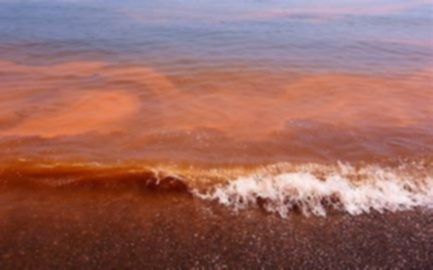

1/1 [==============================] - 2s 2s/step
The predicted class for the image is "Trichodesmium erythraeum"


In [ ]:
model_path = '/content/drive/MyDrive/DL/model/ensembled_model/ensemble.h5'
image_path = '/content/drive/MyDrive/DL/data/dataset/Trichodesmium erythraeum/blur_5_flip_h_r1.jpg'
img1 = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
predicted_class = predict_image_class(model_path, image_path)
print(f'The predicted class for the image is "{predicted_class}"')

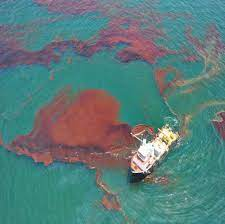

1/1 [==============================] - 1s 542ms/step
The predicted class for the image is "oil_slick"


In [ ]:
model_path = '/content/drive/MyDrive/DL/model/ensembled_model/ensemble.h5'
image_path = '/content/drive/MyDrive/DL/data/dataset/oil_slick/slick25.jpg'
img1 = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
predicted_class = predict_image_class(model_path, image_path)
print(f'The predicted class for the image is "{predicted_class}"')

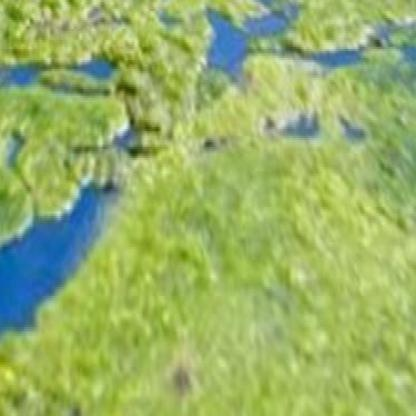

1/1 [==============================] - 0s 411ms/step
The predicted class for the image is "phosphate"


In [ ]:
model_path = '/content/drive/MyDrive/DL/model/ensembled_model/ensemble.h5'
image_path = '/content/drive/MyDrive/DL/data/dataset/phosphate/flip_h_Eutrophication-Pollution_original_Eutrophication--4--jpg_2d435c27-082c-45ab-a40a-4fd353a35ba0_jpg.rf.0ec70e062e1a157d05440ef0a3824be5.jpg'
img1 = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
predicted_class = predict_image_class(model_path, image_path)
print(f'The predicted class for the image is "{predicted_class}"')

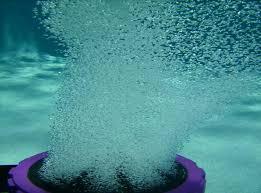

1/1 [==============================] - 1s 652ms/step
The predicted class for the image is "dissolved_oxygen"


In [ ]:
model_path = '/content/drive/MyDrive/DL/model/ensembled_model/ensemble.h5'
image_path = '/content/drive/MyDrive/DL/data/dataset/dissolved_oxygen/O13.jpg'
img1 = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
predicted_class = predict_image_class(model_path, image_path)
print(f'The predicted class for the image is "{predicted_class}"')

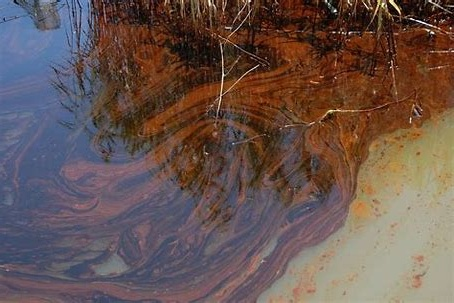

1/1 [==============================] - 1s 579ms/step
The predicted class for the image is "oil_spill"


In [ ]:
model_path = '/content/drive/MyDrive/DL/model/ensembled_model/ensemble.h5'
image_path = '/content/drive/MyDrive/DL/data/dataset/oil_spill/flip_h_os4.jpg'
img1 = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
predicted_class = predict_image_class(model_path, image_path)
print(f'The predicted class for the image is "{predicted_class}"')

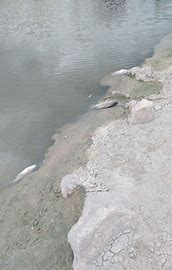

1/1 [==============================] - 1s 901ms/step
The predicted class for the image is "ammonia"


In [ ]:
model_path = '/content/drive/MyDrive/DL/model/ensembled_model/ensemble.h5'
image_path = '/content/drive/MyDrive/DL/data/dataset/ammonia/a10.jpg'
img1 = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)
predicted_class = predict_image_class(model_path, image_path)
print(f'The predicted class for the image is "{predicted_class}"')